In [1]:
import sys 
sys.path.append('..')

In [2]:
import alpenglow.files as af

In [3]:
my_file = af.DCIMGFile('../data/000001.dcimg')

In [4]:
my_file.frames_with_footer

memmap([[  223,  2978,  2421, ...,   769,  2237,   731],
       [  201,  3103,  2434, ...,   895,  2259,   657],
       [  181,  3239,  2372, ...,   837,  2177,   661],
       ..., 
       [ 2916,  2404, 19988, ...,  2223,   627,   641],
       [ 3059,  2512, 19738, ...,  2275,   630,   687],
       [ 2997,  2395, 20691, ...,  2184,   702,   705]], dtype=uint16)

In [5]:
my_file.frames_with_footer.shape

(921607, 1800)

In [6]:
my_file._info

{'bytes_per_frame': array([4194336], dtype=int32),
 'bytes_per_image': array([4194304], dtype=int32),
 'bytes_per_pixel': array([ 4.55111111]),
 'bytes_per_row': array([4096], dtype=int32),
 'filesize': 3254895976,
 'filesize2': 3254895976,
 'format_version': 16777216,
 'mystery1': 1024,
 'num_columns': array([900], dtype=int32),
 'num_frames': 1800,
 'num_rows': array([1024], dtype=int32),
 'num_sessions': 1,
 'pixel_type': array([2], dtype=int32),
 'session0_data': array([728], dtype=int32),
 'session0_offset': 112}

In [7]:
900*1024

921600

In [7]:
f400 = my_file.get_frame(400)

../alpenglow/files.py:93: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self._info['bytes_per_pixel']), ind]
../alpenglow/files.py:97: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  self._info['num_columns']])


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

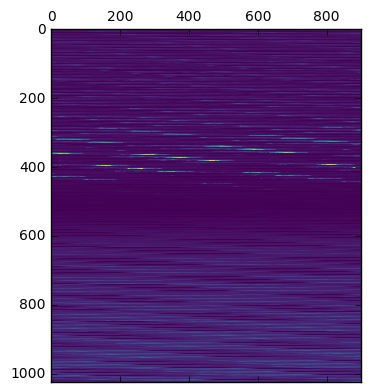

In [9]:
plt.matshow(f400, cmap='viridis')

In [8]:
from skimage.external.tifffile import imsave

In [9]:
frames_without_footer = my_file.frames_with_footer[0:(my_file._info['bytes_per_image'] /
                                       my_file._info['bytes_per_pixel'])]

/Users/nicholasreder/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [10]:
frames_without_footer.shape

(921600, 1800)

In [84]:
frame_data = frames_without_footer.reshape([my_file._info['num_columns'],
                                            my_file._info['num_rows'], -1])

/Users/nicholasreder/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


In [85]:
frame_data.shape

(900, 1024, 1800)

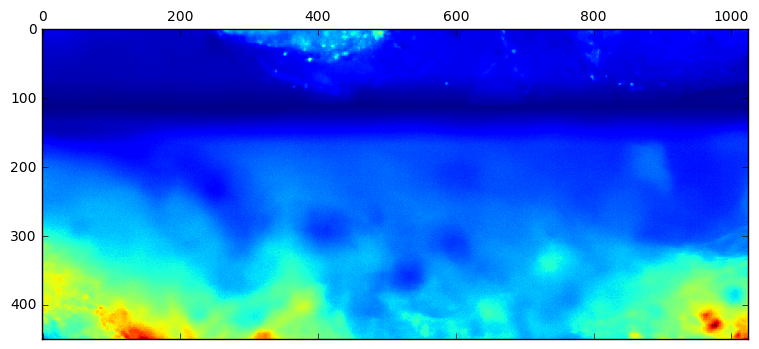

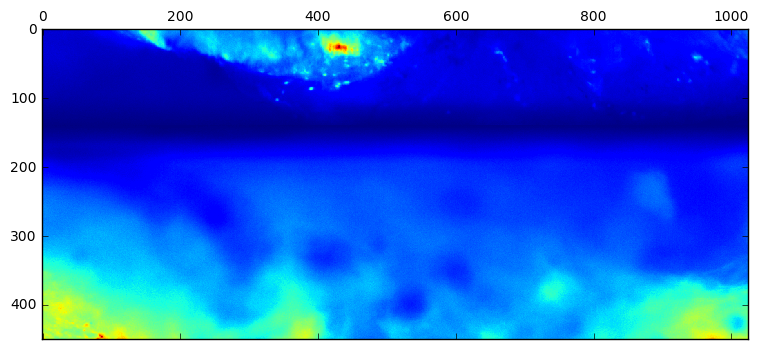

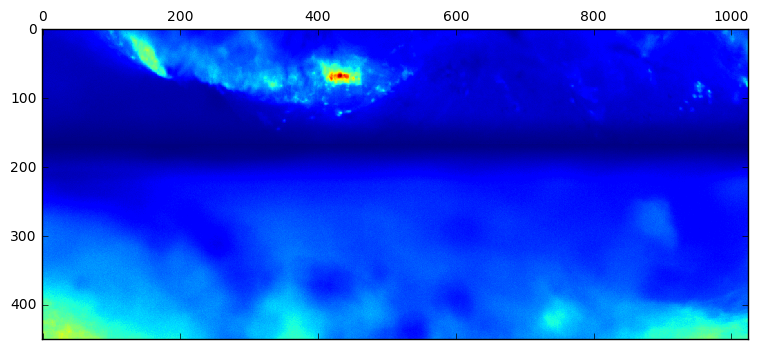

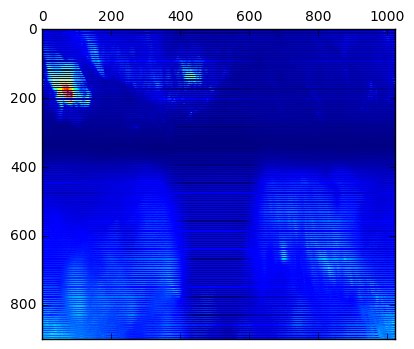

In [22]:
# Checking to see what the images look like. Take [every other vertical pixel stripe, all columns, frame 200] 
plt.matshow(frame_data[::2, :, 200])
plt.matshow(frame_data[::2, :, 250])

plt.matshow(frame_data[::2, :, 300])


### Nick playing with quadrants

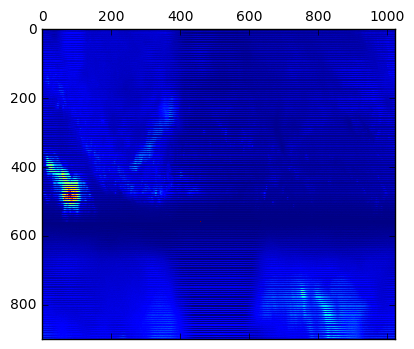

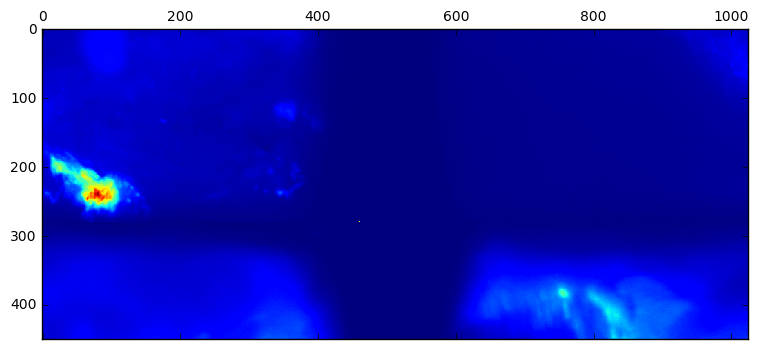

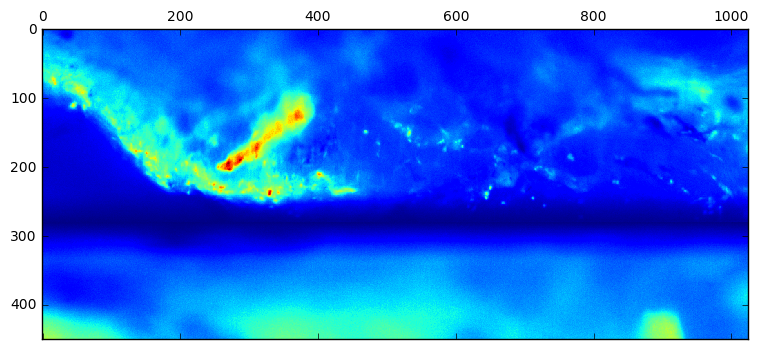

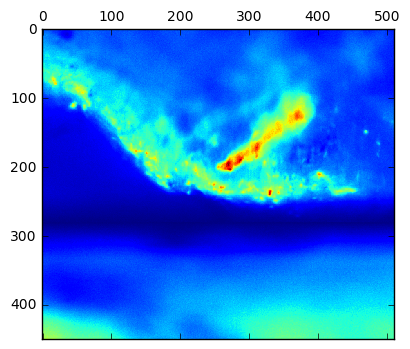

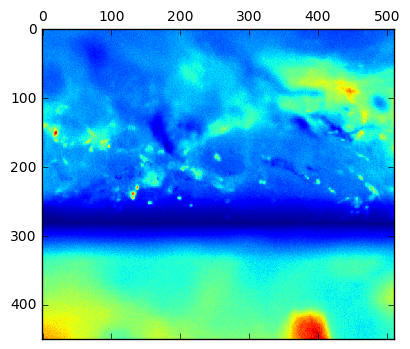

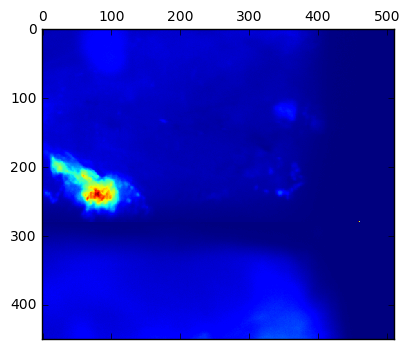

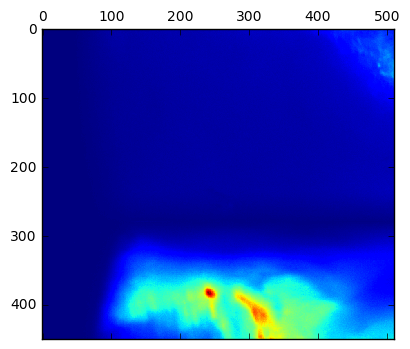

In [89]:
plt.matshow(frame_data[:,:,500])
plt.matshow(frame_data[1::2,:,500])
plt.matshow(frame_data[::2,:,500])
plt.matshow(frame_data[::2,0:511,500])
plt.matshow(frame_data[::2,512:1023,500])
plt.matshow(frame_data[1::2,0:511,500])
plt.matshow(frame_data[1::2,512:1023,500])

### Seeing if we should reorganize in x dimension 

In [54]:
reshaped_width = np.concatenate([frame_data[1::2,(frame_data.shape[1]//2):,200], 
                                 frame_data[1::2,0:(frame_data.shape[1]//2),200]], axis=1)

In [55]:
reshaped_width.shape

(450, 1024)

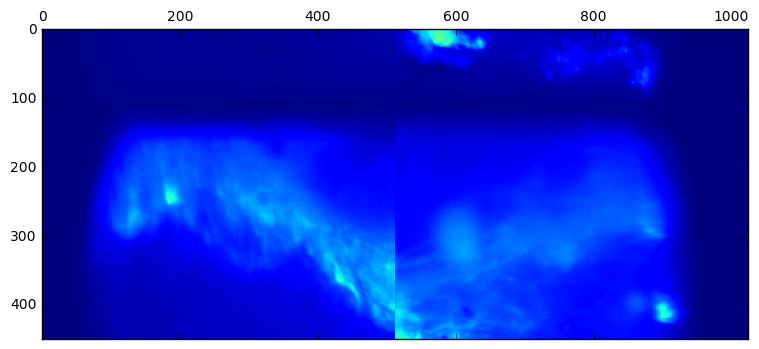

In [56]:
plt.matshow(reshaped_width)

Nope, let's keep X untouched, that looks weird

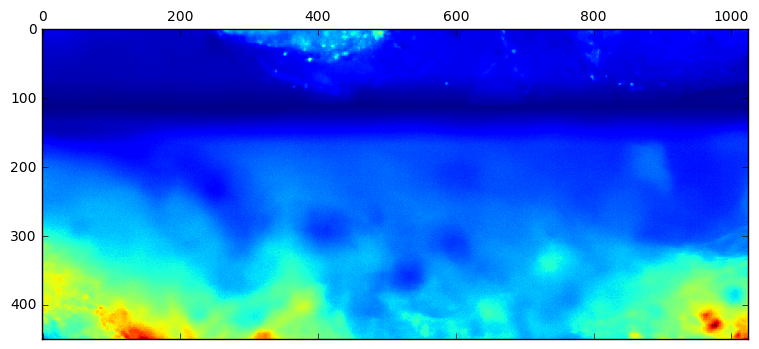

In [83]:
chan1 = frame_data[0::2]
chan2 = frame_data[1::2]
plt.matshow(chan1[:, :, 200])

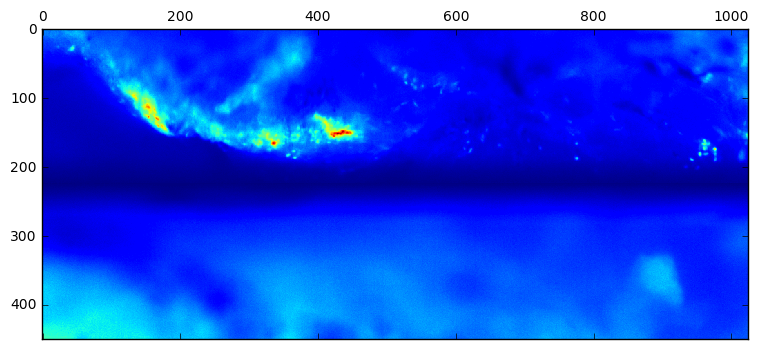

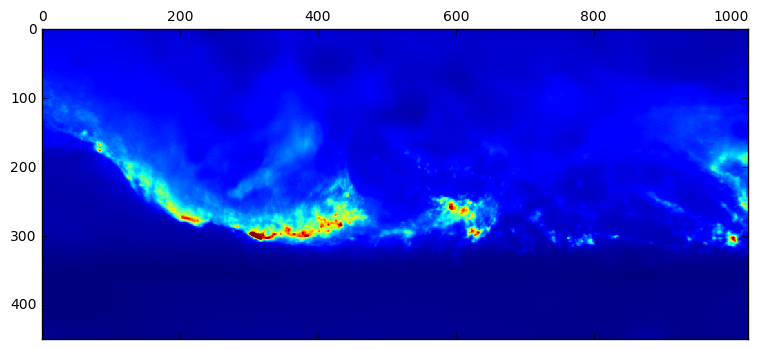

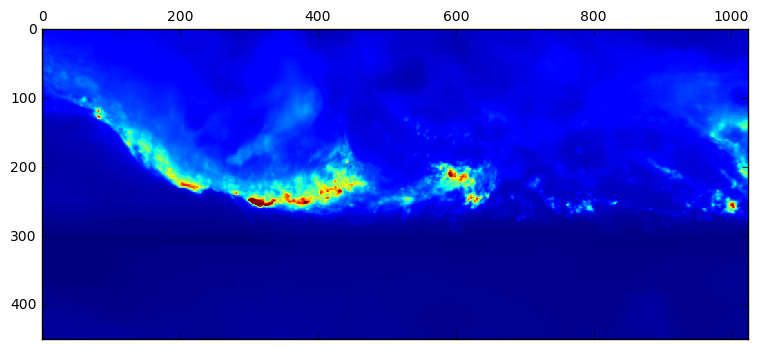

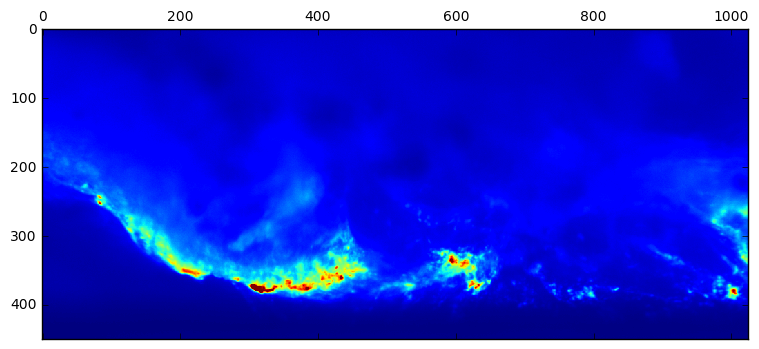

In [90]:
# Figuring out the frame sequence
plt.matshow(frame_data[0::2, :, 400])
plt.matshow(frame_data[0::2, :, 410])

plt.matshow(frame_data[0::2, :, 401])
plt.matshow(frame_data[0::2, :, 403])



In [91]:
chan1_even = frame_data[0::2, :, 0::0]
chan1_odd = frame_data[0::2, :, 1::10]
chan2_even = frame_data[1::2, :, 0::2]
chan2_odd = frame_data[1::2, :, 1::2]

In [192]:
stack = [frame_data[1::2, :, i::25] for i in range(20)]

In [193]:
stack[0].shape

(450, 1024, 72)

In [194]:
frame_data[1::2, :, 1::25].shape

(450, 1024, 72)

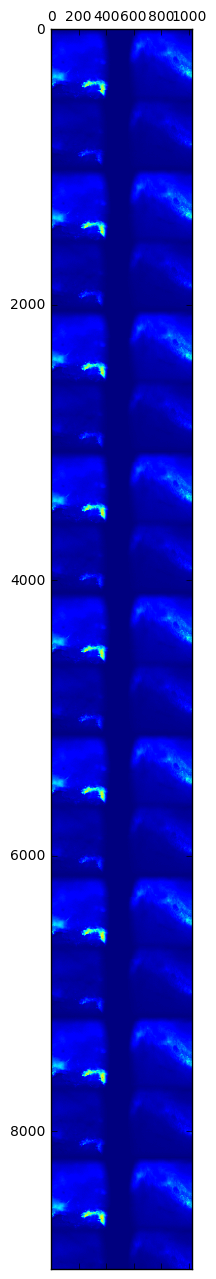

In [196]:
plt.matshow(np.concatenate(stack, axis=0)[:, :, 0])

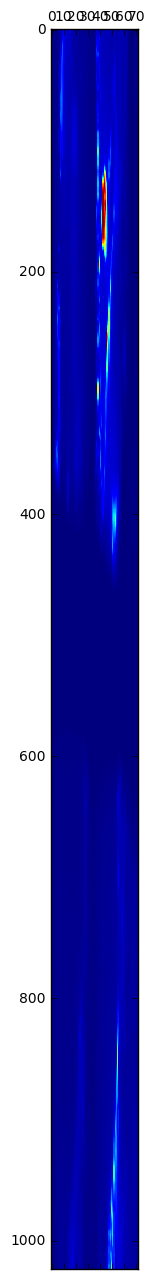

In [184]:
plt.matshow(np.concatenate([frame_data[1::2, :, 0::25], frame_data[1::2, :, 1::25], 
                            frame_data[1::2, :, 2::25], frame_data[1::2, :, 3::25],
                           ], axis=0)[0])

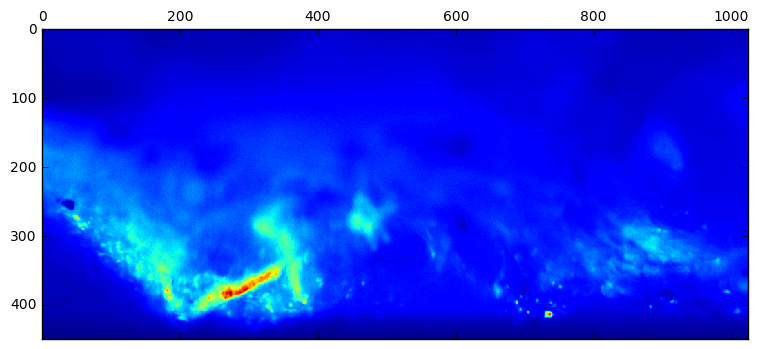

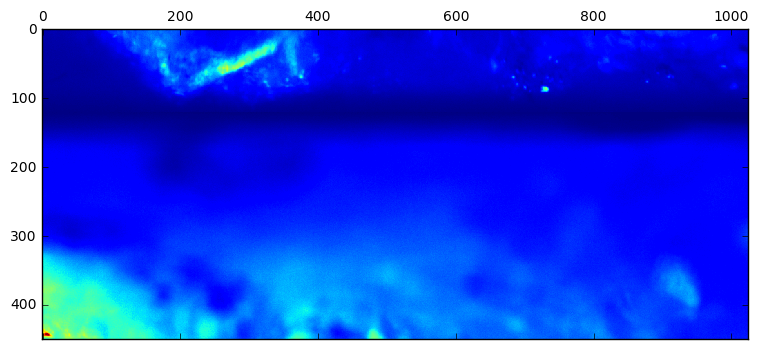

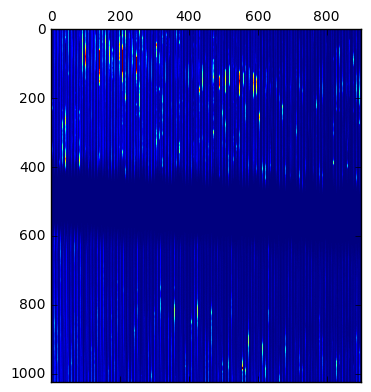

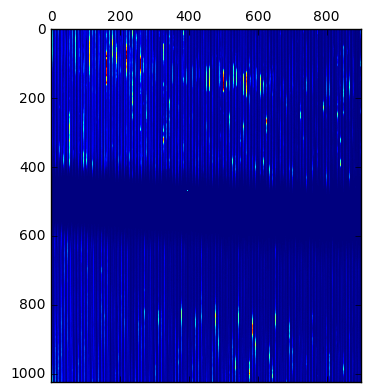

In [78]:
plt.matshow(chan1_even[:, :, 400])
plt.matshow(chan1_odd[:, :, 401])

plt.matshow(chan2_even[400])
plt.matshow(chan2_odd[401])

### Nick seeing if he can concatenate quadrants 

In [41]:
stack = [frame_data[1::2, 0:511, i::25] for i in range(20)]

In [42]:
stack[0].shape

(450, 511, 72)

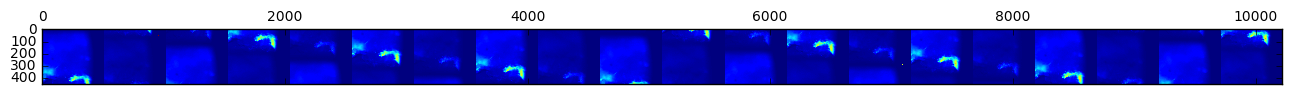

In [46]:
plt.matshow(np.concatenate(stack, axis=1)[:, :, 0])

In [47]:
stack_two = [frame_data[::2, 0:511, i::25] for i in range(20)]

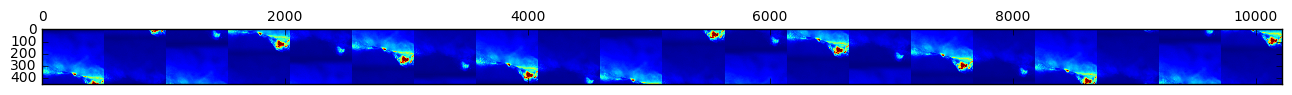

In [48]:
plt.matshow(np.concatenate(stack_two, axis=1)[:, :, 0])

In [15]:
import numpy as np

In [85]:
chan1.shape

(450, 1024, 1800)

In [61]:
for i in range(1, frame_data.shape[-1], 25):
    #aa = np.zeros((chan2.shape[1], chan2.shape[2]+chan2.shape[0]), dtype=np.uint16)
    #aa[:, i:chan2.shape[2]+i] = chan2[i]
    imsave('chan2_image%05d.tiff'%(i+1), frame_data[1::2,:,i])

In [ ]:
for i in range(1, frame_data.shape[-1], 25):
    #aa = np.zeros((chan2.shape[1], chan2.shape[2]+chan2.shape[0]), dtype=np.uint16)
    #aa[:, i:chan2.shape[2]+i] = chan2[i]
    imsave('chan2_image%05d.tiff'%(i+1), frame_data[1::2,:,i])

In [75]:
#creating flat tiffs
chan2_flat = []
for i in range(0, 100):
    chan2_flat.append(frame_data[1::2, :, i::100]) 

In [76]:
len(chan2_flat)

100

In [77]:
chan2_flat_cat = np.concatenate(chan2_flat, axis=2)

In [78]:
chan2_flat_cat.shape

(450, 1024, 1800)

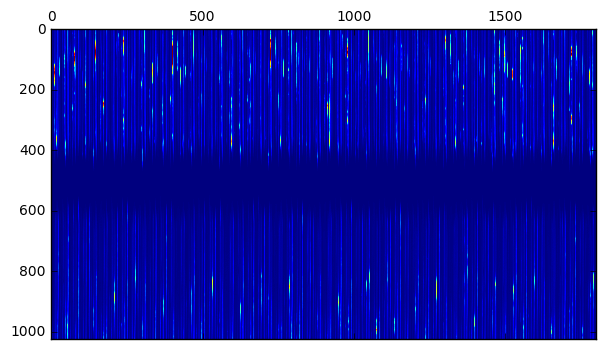

In [79]:
plt.matshow(chan2_flat_cat[0, :, :])

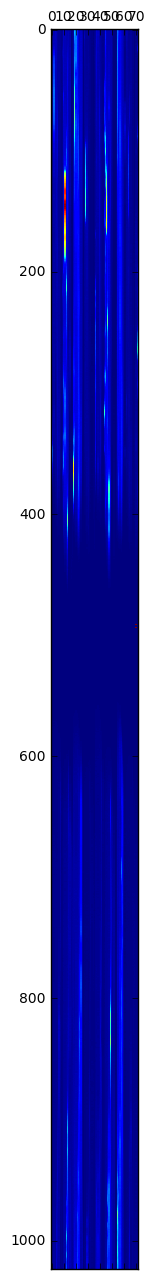

In [80]:
plt.matshow(chan2_flat_cat[0,:,:72])

In [67]:
chan2_flat_arr = np.array(chan2_flat)

In [75]:
chan2_flat_arr_rolled = np.rollaxis(chan2_flat_arr, 3)

In [76]:
chan2_flat_arr_rolled.shape

(72, 25, 450, 1024)

In [77]:
chan2_flat_arr_cat = np.concatenate(chan2_flat_arr_rolled, axis=0)

In [78]:
chan2_flat_arr_cat.shape

(1800, 450, 1024)

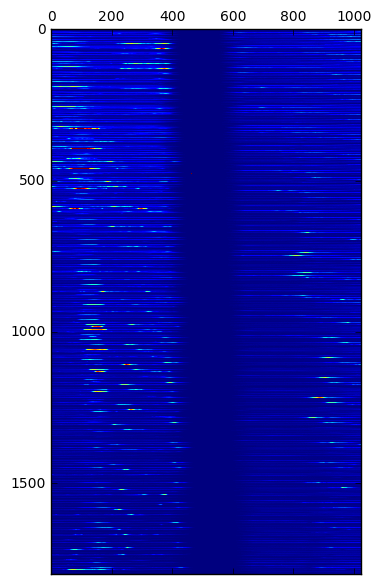

In [79]:
plt.matshow(chan2_flat_arr_cat[:,0,:])